In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_circle():
    y=1.3
    r=np.random.uniform(0.025,0.1)
    x=np.random.uniform(0,1)
    while ((x+r>1) or (x-r<0)):
        x=np.random.uniform(0,1)
        
    return(x,y,r)

In [3]:
#checks for touching circles
def check_touch(x,y,r,XNear,YNear,RNear):
    touching_xlist=[]
    touching_ylist=[]
    touching_rlist=[]
    t=0
    
    for m,n,o in zip(XNear,YNear,RNear):
        dist=np.sqrt((m-x)**2+(n-y)**2)
        if(dist<=(o+r)):
            t+=1
            touching_xlist.append(m)
            touching_ylist.append(n)
            touching_rlist.append(o)
    
    return (t,touching_xlist,touching_ylist,touching_rlist)

In [4]:
#checks where the touching circles are located, how many are there 
def touch_condition(x,y,r,touching_xlist,touching_ylist,touching_rlist):
    left_t=right_t=center_t=0
    
    for m,n,o in zip(touching_xlist,touching_ylist,touching_rlist):
        if(m>x or x+r>=1):
            right_t+=1
        if(m<x or x-r<=0):
            left_t+=1
        if(m==x):
            center_t+=1
    if ((right_t>0) and (left_t>0)):
        return('stay')
    elif (center_t>0 and (right_t>0 or left_t>0)):
        return('stay')
           
    if (right_t>0):
        return('right')
    if (left_t>0):
        return('left')
    if (center_t>0):
        return ('just below')

In [14]:
#if touching a circle, it moves perpendicular to the angle of contact
def rolldown(x,y,r,touching_xlist,touching_ylist,touching_rlist,where):
    '''
    mincontact_angle=np.pi/2
    for m, n, o in zip (touching_xlist,touching_ylist,touching_rlist)
        if(abs(math.atan((y-n)/(x-m))) < mincontact_angle)
            mincontact_angle = math.atan((y-n)/(x-m))    
    angle=mincontact_angle+math.radians(90)
    '''
    #new_y=y-(0.0001*math.sin(angle))
    if (where=='right'):
        new_x=x-.005#(0.001*math.cos(angle))
    elif (where=='left'):
        new_x=x+.005#(0.001*math.cos(angle))
    
    return(new_x)
    

0.9823184869734677


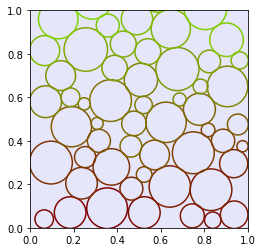

In [72]:
xList=[]
yList=[]
rList=[]
Area=0
fig, ax = plt.subplots()
ax.set_aspect(1)
ax.set(xlim=(0, 1), ylim = (0, 1))
shade_R=0.5
shade_G=shade_B=0.01
ax.set_aspect(1)
counter = 0

while (Area<=(1-np.pi*0.1**2) and counter < 200):
    circle_can_move=True
    x,y,r=generate_circle()
    counter+=1
    uwu=0
    while (circle_can_move==True and uwu < 300):
        uwu+=1
        if (y-r<=0):
            xList.append(x)
            yList.append(y)
            rList.append(r)
            Area+=np.pi*r**2
            circle_can_move=False
        else:
            touch,x_tList,y_tList,r_tList=check_touch(x,y,r,xList,yList,rList)
            if (touch==0):
                y-=0.005
            elif(touch > 0):
                where = touch_condition(x,y,r,x_tList,y_tList,r_tList)
                if (where=='stay'):
                    xList.append(x)
                    yList.append(y)
                    rList.append(r)
                    Area+=np.pi*r**2
                    circle_can_move=False
                elif(where=='just below'):
                    x+=np.random.uniform(-.01,.01)
                else:
                    x = rolldown(x,y,r,x_tList,y_tList,r_tList,where)
    
print(Area)                    
for i in range(len(xList)):
    shade_G=i/len(xList)
    circle1 = plt.Circle((xList[i], yList[i]), rList[i], color = (shade_R,shade_G,shade_B),fill=False, linewidth=1.5)
    ax.add_artist(circle1)

ax.set_facecolor("lavender")

plt.show()
#ax.axis('equal')
#for i in range(len(xList)):
